In [35]:
import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
pd.options.display.float_format = '{:.3f}'.format

In [14]:
m = pd.read_csv('/Users/a123/Desktop/project/blog_post_monthly.csv')
d = pd.read_csv('/Users/a123/Desktop/project/blog_post_daily.csv')
print(m.shape, d.shape)
display(m.head())
display(d.head())

(67, 5) (2060, 5)


,month,imp,click,ctr,income
0,201706,125258,2,0.0,247
1,201707,183973,12,0.0,7465
2,201708,60054,2,0.0,1143
3,201709,206294,6,0.0,670
4,201710,132588,4,0.0,180


,date,imp,click,ctr,income
0,20170601,0,0,0.0,0
1,20170602,0,0,0.0,0
2,20170603,0,0,0.0,0
3,20170604,0,0,0.0,0
4,20170605,0,0,0.0,0


## corr

In [24]:
display(m.corr())
print(stats.pearsonr(m.ctr, m.income))
print('{:.8f}'.format(4.647171951111738e-06))

,month,imp,click,ctr,income
month,1.000,-0.524,0.331,0.482,0.466
imp,-0.524,1.000,-0.103,-0.443,-0.182
click,0.331,-0.103,1.000,0.741,0.586
ctr,0.482,-0.443,0.741,1.000,0.527
income,0.466,-0.182,0.586,0.527,1.000


(0.5268623619712253, 4.647171951111738e-06)
0.00000465


* 수익은 노출량과 약한 음의 상관관계 -> impression은 분모이므로 이 값이 커질수록 ctr은 작아지고, 그럼 자연스레 income더 작아짐
* 수익은 click, ctr과 양의 상관관계

In [26]:
display(d.corr())
print(stats.pearsonr(d.ctr, d.income))
print('{:.8f}'.format(8.561533446663211e-79))

,date,imp,click,ctr,income
date,1.000,-0.183,0.116,0.150,0.106
imp,-0.183,1.000,0.135,-0.050,0.025
click,0.116,0.135,1.000,0.744,0.406
ctr,0.150,-0.050,0.744,1.000,0.397
income,0.106,0.025,0.406,0.397,1.000


(0.39715699820138867, 8.561533446663211e-79)
0.00000000


## plot

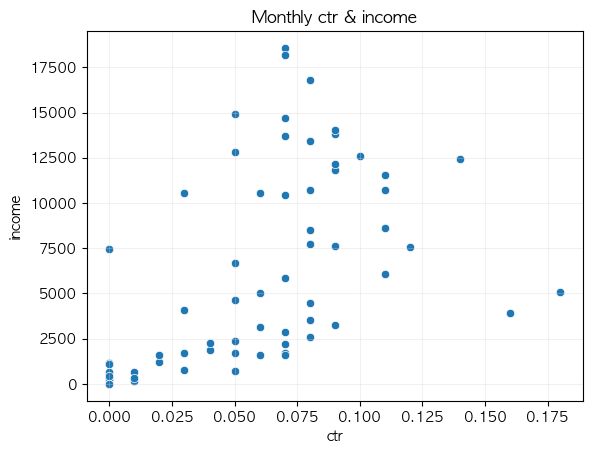

In [32]:
sns.scatterplot(data=m, x='ctr', y='income')
plt.title('Monthly ctr & income')
plt.grid(color='lightgrey', alpha=0.3)

* ctr이 클수록 income 역시 커질 줄 알았는데 항상 그렇지는 않음

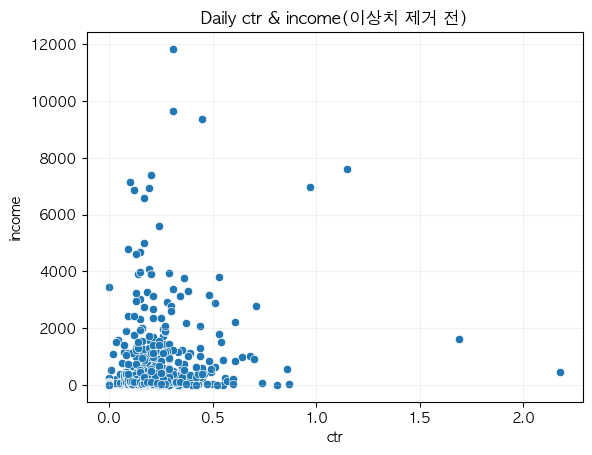

In [34]:
sns.scatterplot(data=d, x='ctr', y='income')
plt.title('Daily ctr & income(이상치 제거 전)')
plt.grid(color='lightgrey', alpha=0.3)

In [42]:
ctr_q1 = np.percentile(d['ctr'], 25)
ctr_q3 = np.percentile(d['ctr'], 75)
ctr_IQR = ctr_q3 - ctr_q1
ctr_outlier_point = ctr_q3 + (ctr_IQR * 1.5)

inc_q1 = np.percentile(d['income'], 25)
inc_q3 = np.percentile(d['income'], 75)
inc_IQR = inc_q3 - inc_q1
inc_outlier_point = inc_q3 + (inc_IQR * 1.5)
print(ctr_outlier_point, inc_outlier_point)

0.2 127.5


,date,imp,click,ctr,income
date,1.000,-0.256,0.064,0.093,0.469
imp,-0.256,1.000,0.090,-0.026,0.020
click,0.064,0.090,1.000,0.937,0.588
ctr,0.093,-0.026,0.937,1.000,0.545
income,0.469,0.020,0.588,0.545,1.000


(0.5446188872888332, 3.0785563432124164e-127)
0.00000000


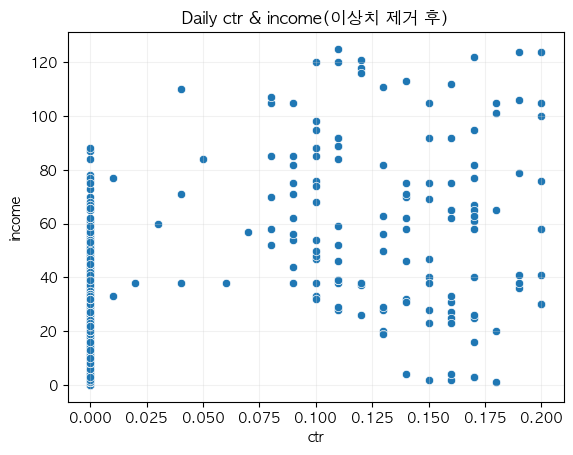

In [47]:
sns.scatterplot(data=d.query("ctr <= 0.2 and income <= 127.5"), x='ctr', y='income')
plt.title('Daily ctr & income(이상치 제거 후)')
plt.grid(color='lightgrey', alpha=0.3)

display(d.query("ctr <= 0.2 and income <= 127.5").corr())
print(stats.pearsonr(d.query("ctr <= 0.2 and income <= 127.5").ctr, d.query("ctr <= 0.2 and income <= 127.5").income))
print('{:.8f}'.format(3.0785563432124164e-127))

* 이상치 제거 후 Daily ctr과 income의 상관관계가 더 강해짐 (0.397 -> 0.545)
* Daily 데이터는 0이 너무 많아보임. 이상치 제거의 가장 기본적인 방법을 적용했지만, 과연 Q3 + iqr * 1.5 이상을 이상치로 판단하는 게 맞을까? 오히려 ctr이 0일 때 income이 0인 애들을 제외하고 보는 게 더 합리적이지 않을까?

## EDA

In [48]:
d.head()

,date,imp,click,ctr,income
0,20170601,0,0,0.000,0
1,20170602,0,0,0.000,0
2,20170603,0,0,0.000,0
3,20170604,0,0,0.000,0
4,20170605,0,0,0.000,0


Text(0.5, 1.0, 'Monthly income bar plot')

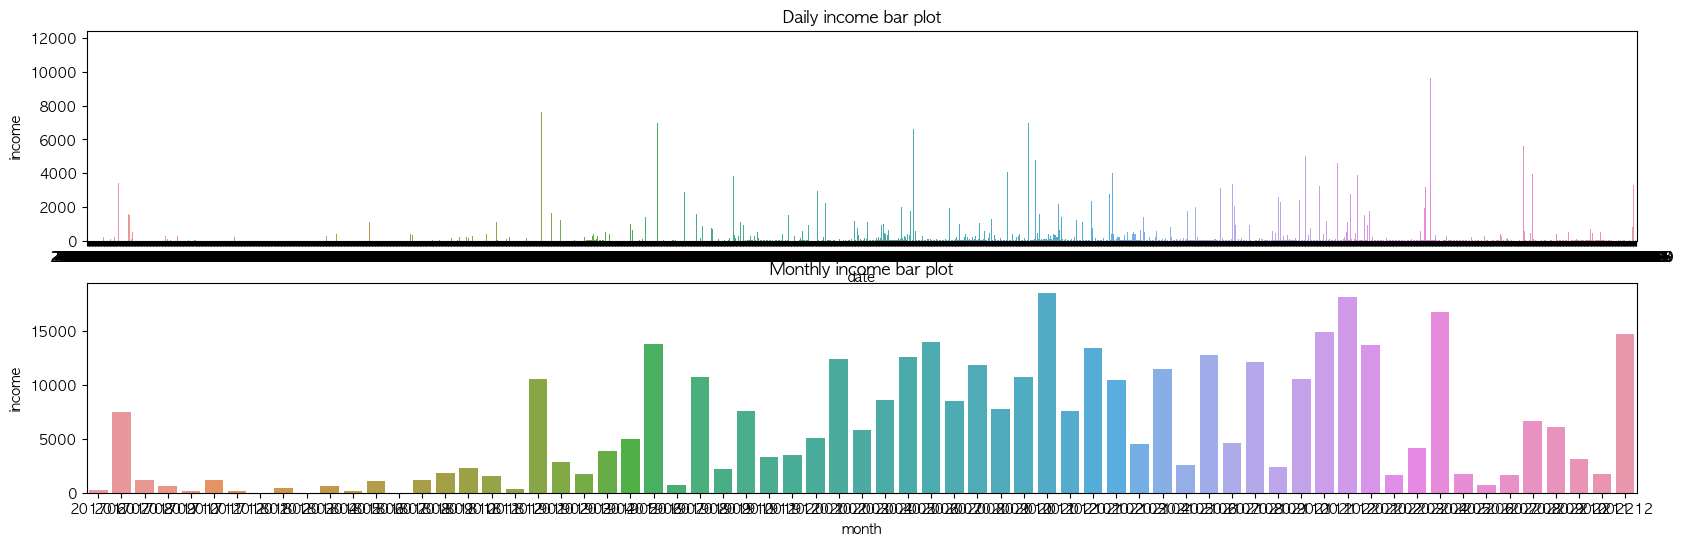

In [71]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 6))
sns.barplot(data=d, x='date', y='income', ax=ax1)
sns.barplot(data=m, x='month', y='income', ax=ax2)
# ax2.set_xticklabels(rotation=90)
ax1.set_title('Daily income bar plot')
ax2.set_title('Monthly income bar plot')

In [97]:
print(f"""daily 데이터 전체 row 개수: {len(d)}\nctr=0 개수: {len(d.query("ctr==0"))}\nctr=0 비율(%): {round(len(d.query("ctr==0")) / len(d) * 100, 2)}""")
display(d.describe())

daily 데이터 전체 row 개수: 2060
ctr=0 개수: 1501
ctr=0 비율(%): 72.86


,date,imp,click,ctr,income
count,2060.000,2060.000,2060.000,2060.000,2060.000
mean,20197863.208,1037.109,0.398,0.059,196.687
std,16429.505,3360.295,0.806,0.133,758.609
min,20170601.000,0.000,0.000,0.000,0.000
25%,20181028.750,466.000,0.000,0.000,0.000
50%,20200326.500,716.000,0.000,0.000,18.000
75%,20210823.250,983.000,1.000,0.080,51.000
max,20230120.000,100501.000,14.000,2.180,11844.000


* ctr=0인 비율이 Daily 전체 데이터의 약 73%를 차지하고 있음
* ctr=0이면 income 역시 0일 수밖에 없음.
* ctr=0인 날들을 제외하고 상관관계 다시 확인

In [115]:
print(f"Daily ctr > 0인 data들의 correlation coefficient: {stats.pearsonr(x=d.loc[d['ctr'] > 0, ['ctr', 'income']]['ctr'], y=d.loc[d['ctr'] > 0, ['ctr', 'income']]['income'])}")
print('{:.8f}'.format(2.1493939556259717e-05))

Daily ctr > 0인 data들의 correlation coefficient: (0.17865633874406203, 2.1493939556259717e-05)
0.00002149


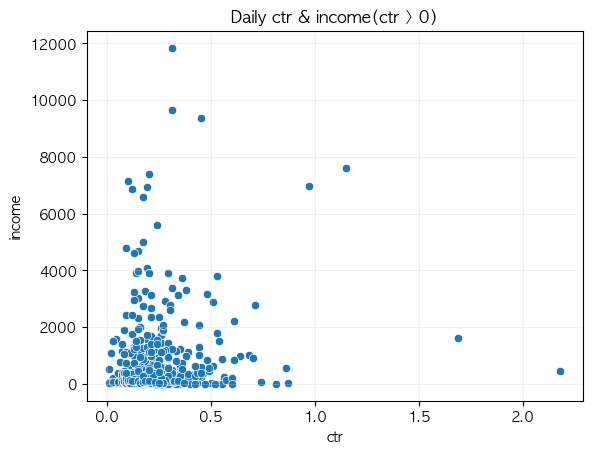

In [117]:
sns.scatterplot(data=d.loc[d['ctr'] > 0, ['ctr', 'income']], x='ctr', y='income')
plt.title('Daily ctr & income(ctr > 0)')
plt.grid(color='lightgrey', alpha=0.3)